# Simulando processo de nascimento e morte

### Processos Estocásticos - 2023/01

Thomas Peron

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams



rcParams['font.family'] = 'serif'
rcParams['font.serif'] = 'Times'
rcParams['svg.fonttype'] = 'none'

import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 400 

Definição do processo de nascimento e morte: 

$$
\begin{align*}
\Pr\{N(t+h) & =i+1|N(t)=i\}=\lambda_{i}h+\mathcal{O}(h)\\
\Pr\{N(t+h) & =i-1|N(t)=i\}=\mu_{i}h+\mathcal{O}(h)\\
\Pr\{N(t+h) & =i|N(t)=i\}=1-(\lambda_{i}h+\mu_{i}h)+\mathcal{O}(h)\\
\Pr\{N(t+h) & =i+k|N(t)=i\}=\mathcal{O}(h),\mbox{ }|k|>1.
\end{align*}
$$

Vamos considerar taxas constantes, i.e. $\lambda_i = \lambda$ e $\mu_i = \mu$.

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


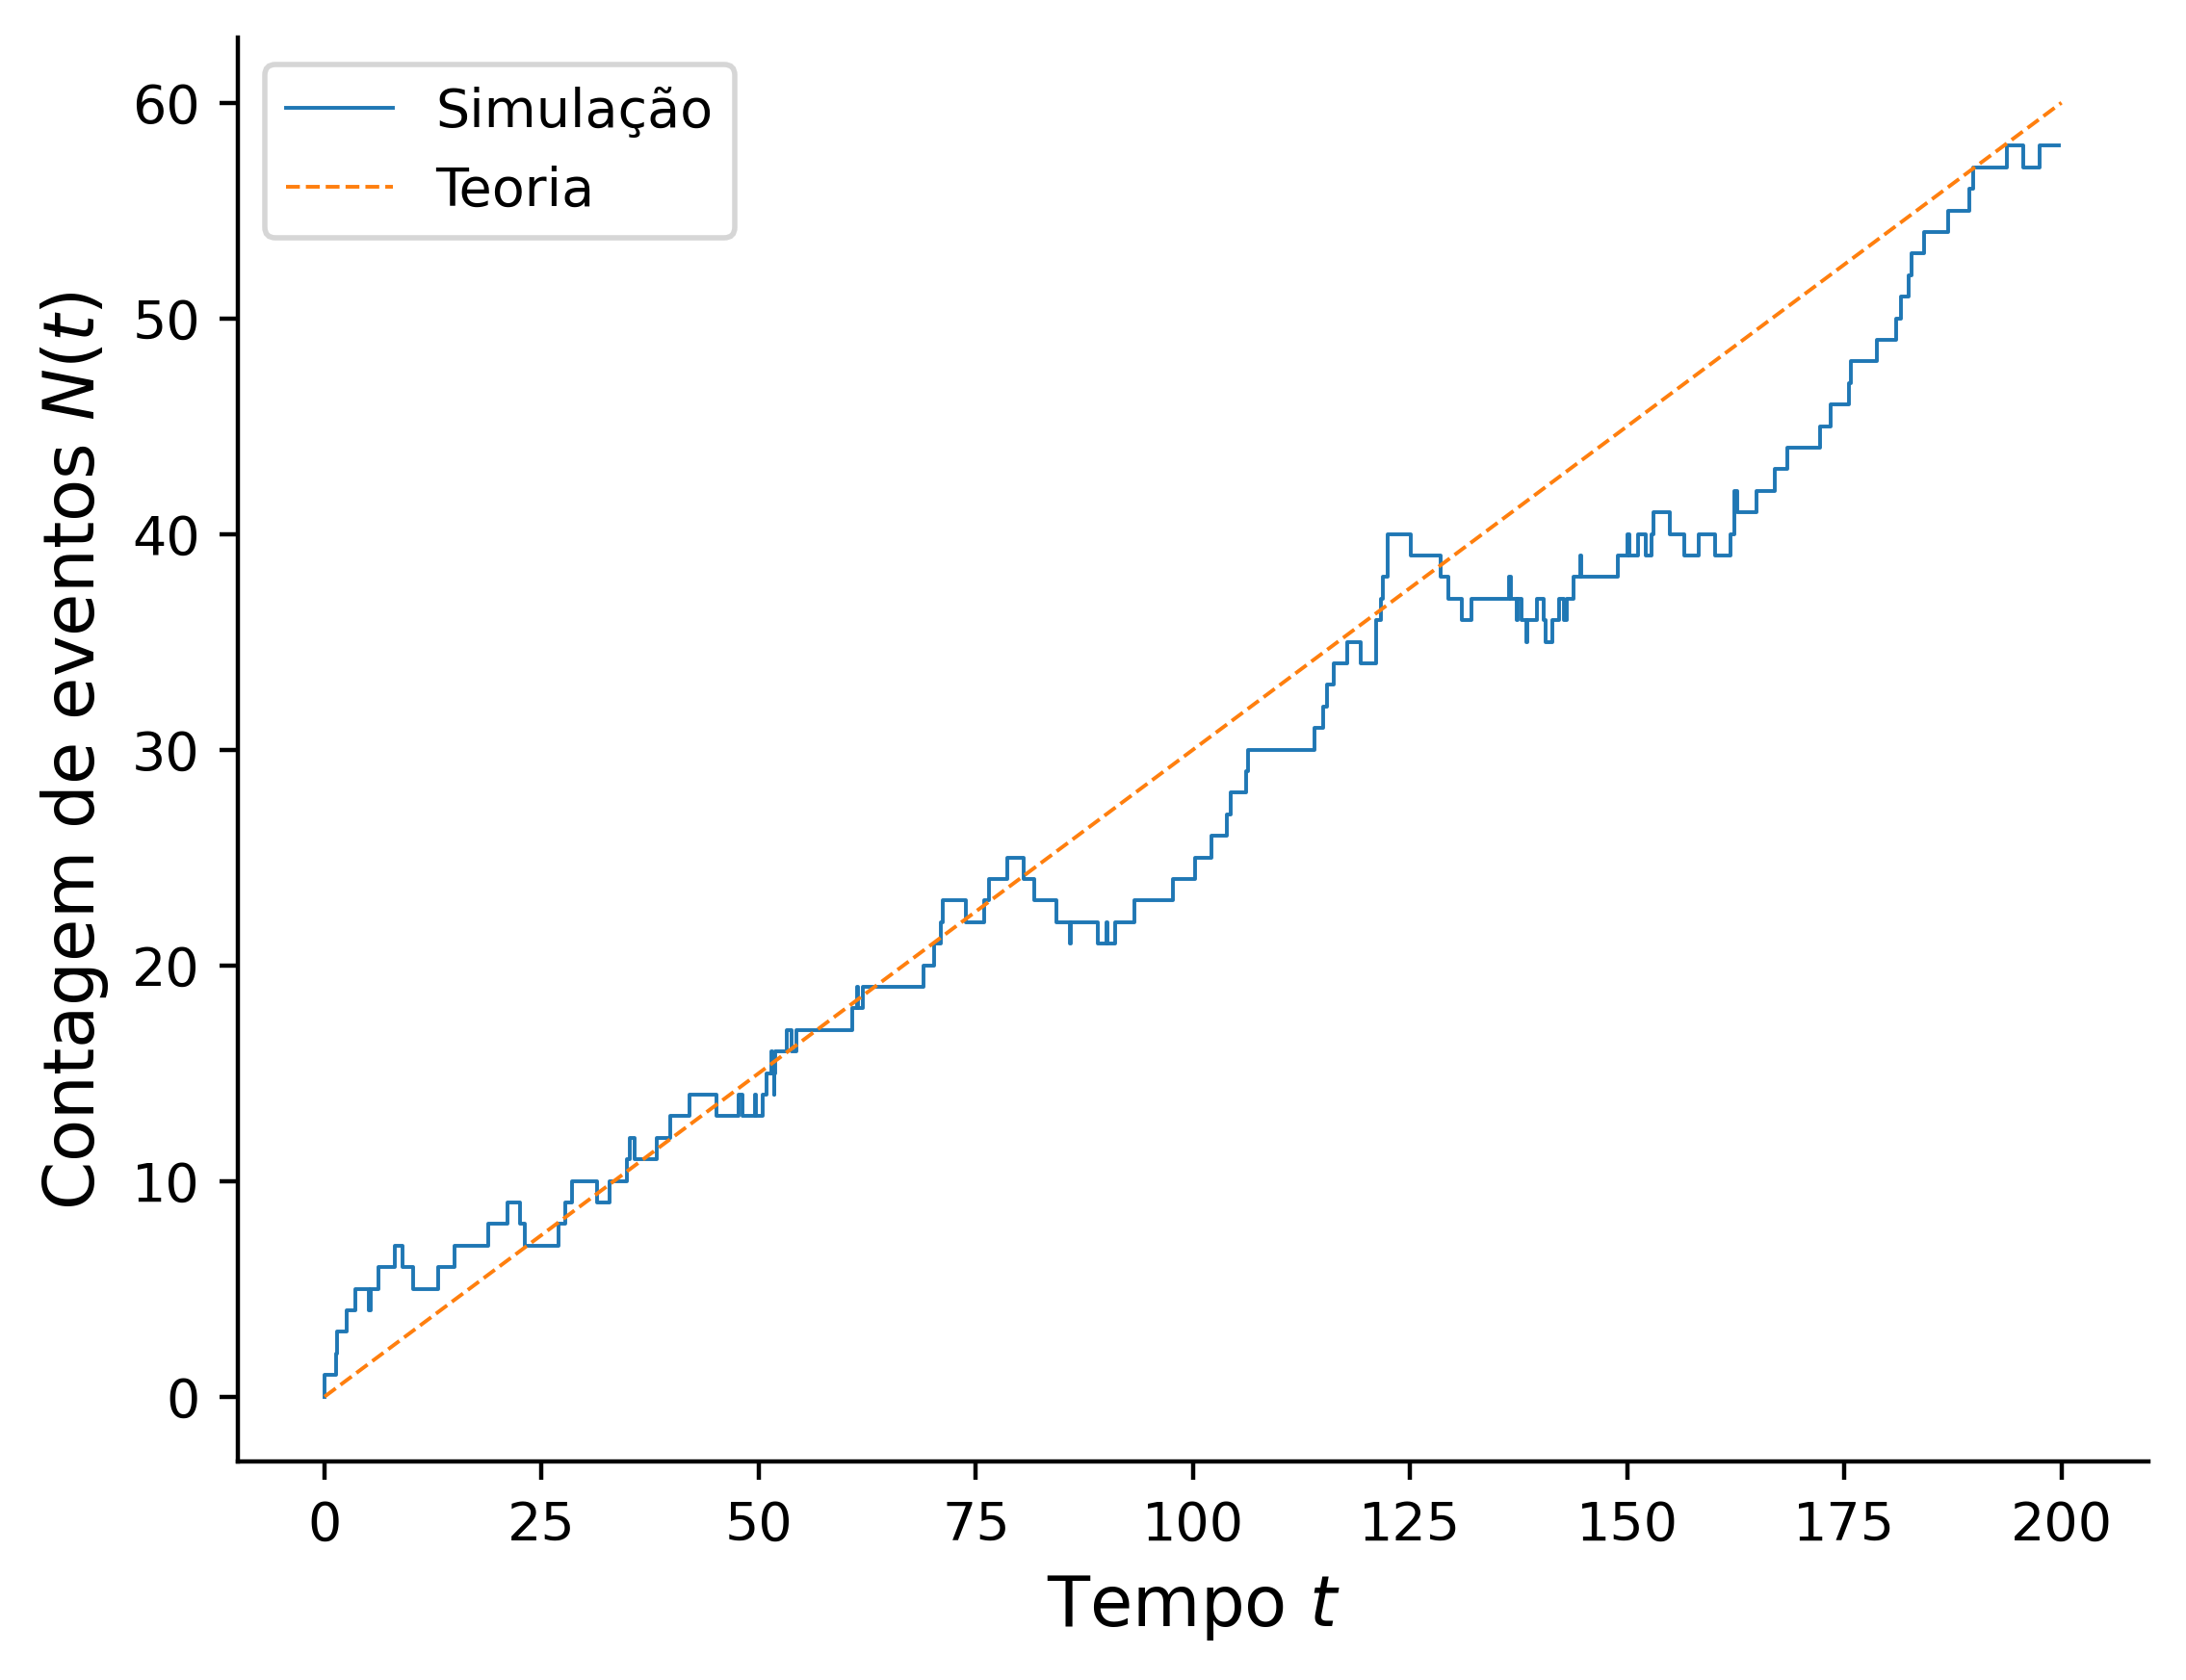

In [2]:
lmbda = 0.5
mu = 0.2
t_tot = 200 # tempo total da simulacao
t = 0
dt = 0 # intervalo entre eventos
vt = []
N = 0 # populacao inicial
Nt = [] # populacao no tempo t

Nt.append(N)
vt.append(t)
while (t + dt < t_tot):
    
    dt = np.random.exponential(1/(lmbda + mu)) # algo (morte ou nascimento) ocorre com uma taxa lmbda + mu.
    
    t = t + dt # instante de tempo em que o evento ocorrerá. 
    
    vt.append(t)
    
    if (np.random.uniform() < lmbda/(lmbda+mu) ):
        
        N = N + 1
    else:
        N = N - 1
    
    Nt.append(N)

    
t_ = np.linspace(0,t_tot,1000)
Nt_theo = (lmbda - mu)*t_ #+ Nt[0]

fig = plt.figure()
ax = fig.add_subplot(111)
for ax in fig.get_axes():

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
ax.step(vt,Nt,'-',linewidth=0.7,label=r'Simulação')
ax.plot(t_,Nt_theo,'--',linewidth=0.7,label=r'Teoria')
ax.legend(loc='upper left',fontsize=10)
ax.set_ylabel(r'Contagem de eventos $N(t)$',fontsize=13)
ax.set_xlabel(r'Tempo $t$',fontsize=13)
plt.show()


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


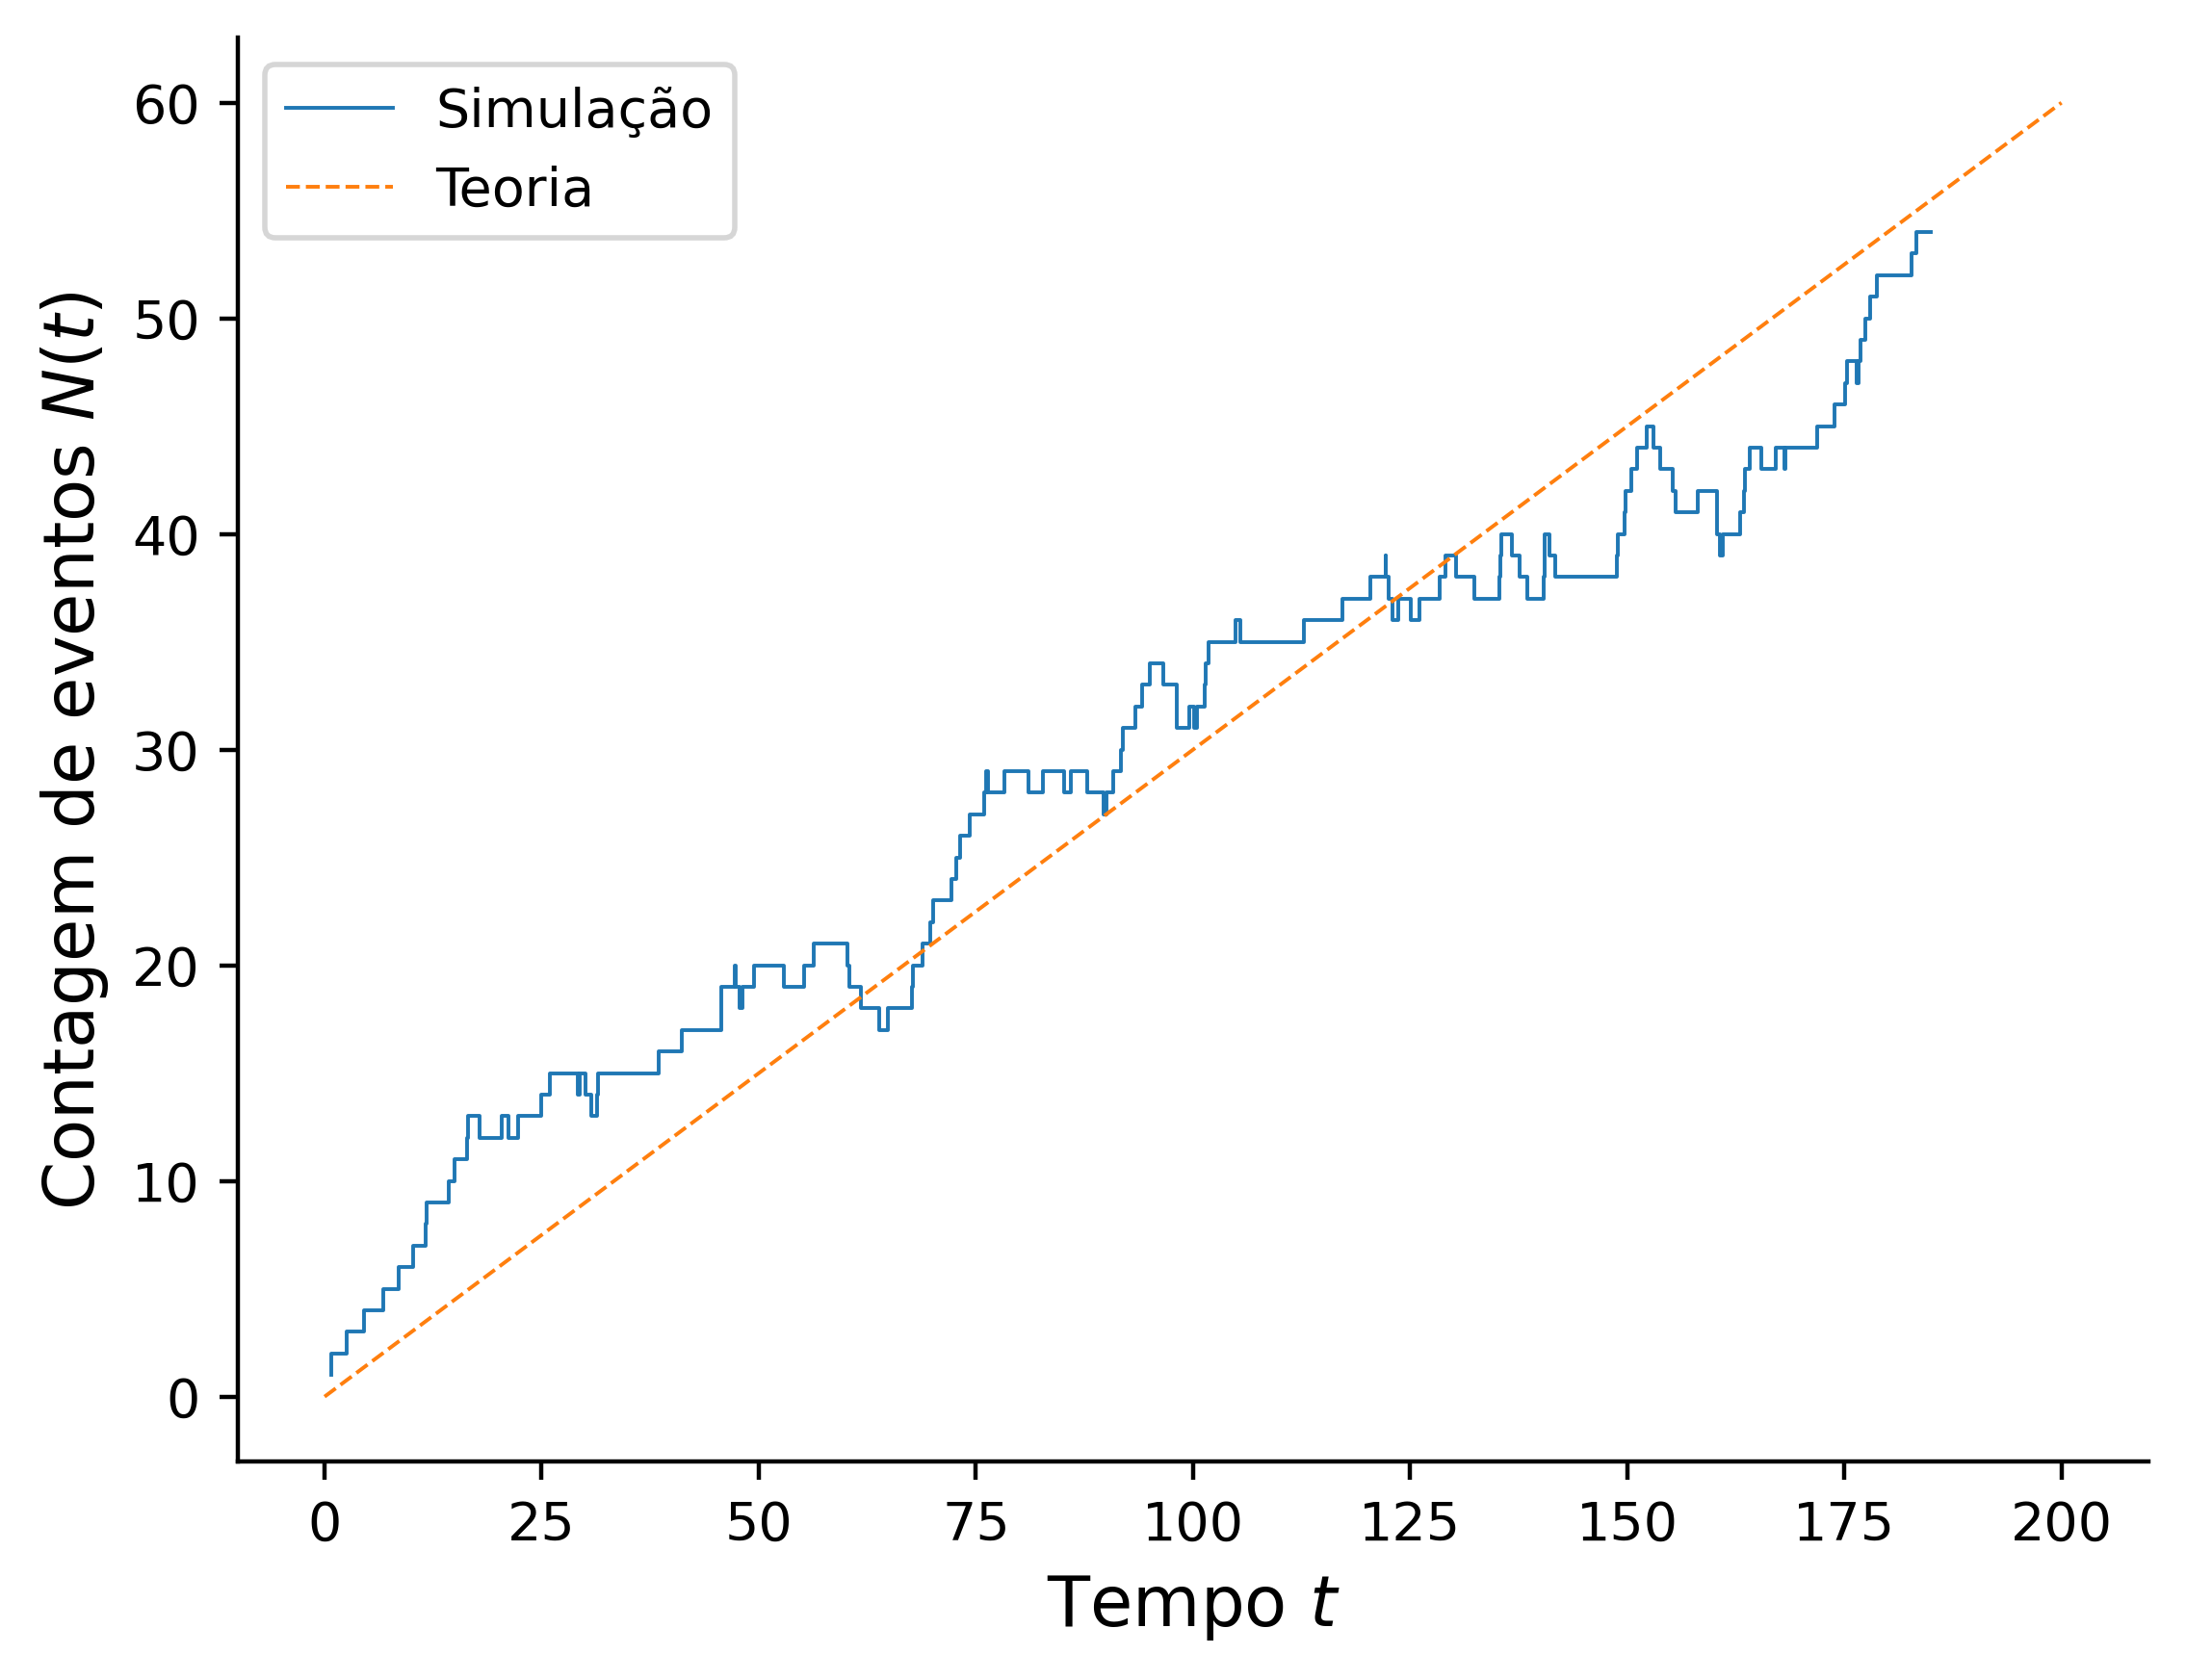

In [3]:
t_tot = 200

N_eventos = int((lmbda+mu)*t_tot)
inter_arrival = np.random.exponential(1/(lmbda + mu),N_eventos)

rdm_temp = np.random.random(len(inter_arrival))

prob = lmbda/(lmbda+mu)
N = np.zeros(len(inter_arrival))

mask = rdm_temp<prob
N[mask] = 1
N[~mask]= -1

Nt = np.cumsum(N)
T = np.cumsum(inter_arrival)

t_theo = np.linspace(0,t_tot,1000)
Nt_theo = (lmbda - mu)*t_theo #+ Nt[0]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.step(T,Nt,'-',linewidth=0.7,label=r'Simulação')
ax.plot(t_theo,Nt_theo,'--',linewidth=0.7,label=r'Teoria')
ax.legend(loc='upper left',fontsize=10)
ax.set_ylabel(r'Contagem de eventos $N(t)$',fontsize=13)
ax.set_xlabel(r'Tempo $t$',fontsize=13)
for ax in fig.get_axes():

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
plt.show()


## Realizando mais experimentos

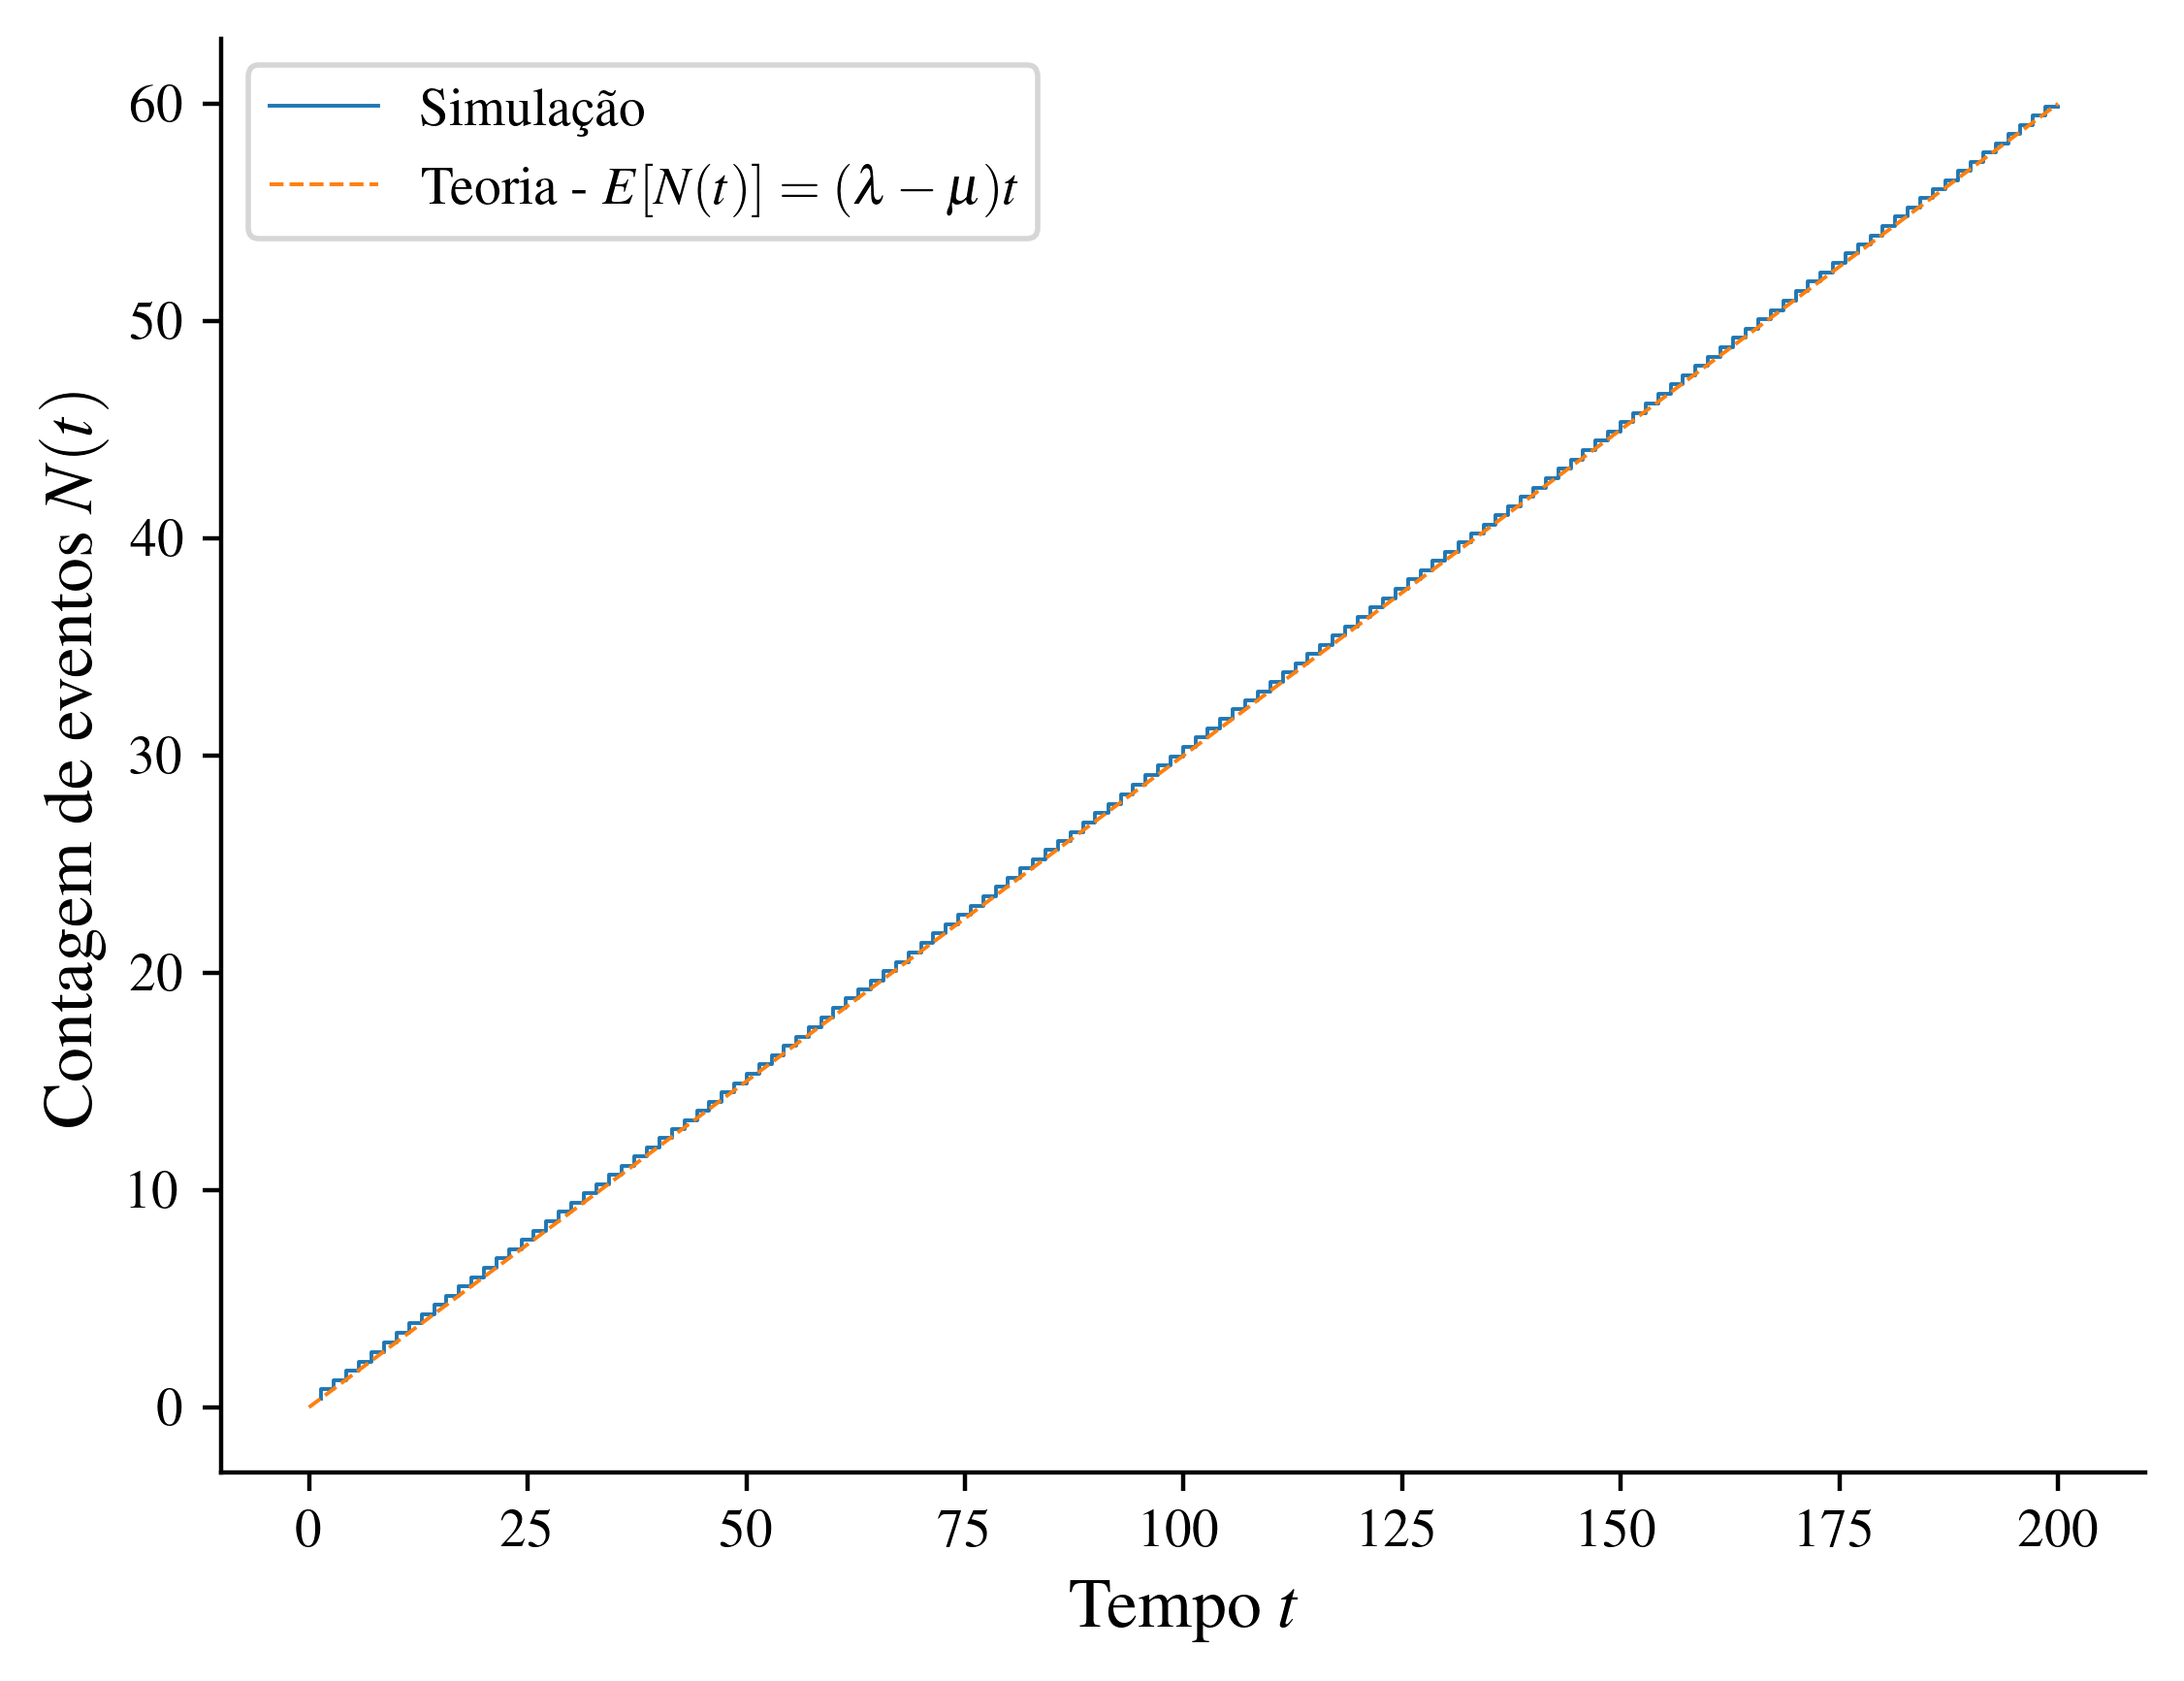

In [5]:
t_tot = 200
num_experimentos = 10000
N_eventos = int((lmbda+mu)*t_tot) #numero medio de eventos que ocorrem em t_tot tempo. 


N_avg = np.zeros(N_eventos)
T_avg = np.zeros(N_eventos)

for i in range(num_experimentos):
    inter_arrival = np.random.exponential(1/(lmbda + mu),N_eventos)

    rdm_temp = np.random.random(len(inter_arrival))
    prob = lmbda/(lmbda+mu)
    N = np.zeros(len(inter_arrival))

    mask = rdm_temp<prob
    N[mask] = 1
    N[~mask]= -1

    Nt = np.cumsum(N)
    T = np.cumsum(inter_arrival)

    N_avg = N_avg + (1/num_experimentos)*Nt
    T_avg = T_avg + (1/num_experimentos)*T
    
t_theo = np.linspace(0,t_tot,1000)
Nt_theo = (lmbda - mu)*t_theo #+ Nt[0]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.step(T_avg,N_avg,'-',linewidth=0.7,label=r'Simulação')
ax.plot(t_theo,Nt_theo,'--',linewidth=0.7,label=r'Teoria - $E[N(t)] = (\lambda - \mu)t$')
ax.legend(loc='upper left',fontsize=10)
ax.set_ylabel(r'Contagem de eventos $N(t)$',fontsize=13)
ax.set_xlabel(r'Tempo $t$',fontsize=13)
for ax in fig.get_axes():

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
plt.show()
